In [2]:
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb


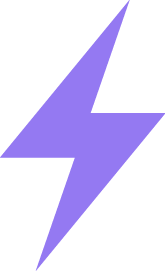

Running local mode, some functionality limited.



In [4]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [5]:
sixty = pd.read_csv('europe60.csv')

In [6]:
sixty.head()

Name         Country  Population rank (core city)  \
0   Paris          France                          NaN   
1  London  United Kingdom                          NaN   
2    Ruhr         Germany                          NaN   
3  Madrid           Spain                          NaN   
4  Berlin         Germany                          NaN   

   Population rank (Primary Statistical Area)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Distance to closest larger Chinese Metropolitan Area (KM)  Power  \
0                                                NaN            NaN   
1                                                NaN            NaN   
2                                                NaN            NaN   
3                                                NaN            NaN   
4                                                NaN            NaN   

   Population MetropolitanArea  Population MetroPower  \
0                     11800000                    NaN   
1                     12200000                    NaN   
2                     11300000                    NaN   
3                      6600000                    NaN   
4                      6563194                    NaN   

   Rolling population total  GDP per capita of Province  \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

   Distance from a foreign country (KM)  Score  \
0                                   NaN    NaN   
1                                   NaN    NaN   
2                                   NaN    NaN   
3                                   NaN    NaN   
4                                   NaN    NaN   

   If part of a larger city's transportation, city name  Closest City Name  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                NaN                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

   Closest City Rank  Largest in Province?  Longitude  Latitude  
0                NaN                   NaN   48.90000    2.2500  
1                NaN                   NaN   51.50000    0.0000  
2                NaN                   NaN   51.50000    7.4000  
3                NaN                   NaN   40.33333   -3.8500  
4                NaN                   NaN   52.50000   13.3333

# DBSCAN

In [7]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

## 60 Largest Cities

In [8]:
sixty = pd.read_csv('europe60.csv')
X = sixty[['Latitude','Longitude']]
x = sixty['Latitude']
y = sixty['Longitude']
labels = sixty['Name']
lgn.scatter(x, y, labels = sixty['Name'])

Silhouette Coefficient: 0.005
Estimated number of clusters: 5
Homogeneity: 0.323
Completeness: 0.896
V-measure: 0.475
[ True  True  True False False False  True False False False False  True
  True  True  True  True  True False False  True  True False False  True
 False False  True False False False  True False  True  True False False
 False False False  True  True  True  True False  True False  True  True
  True False False False False  True False  True False False False  True]


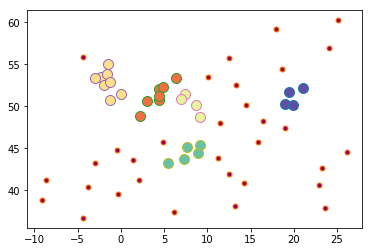

In [9]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.346
Estimated number of clusters: 7
Homogeneity: 0.465
Completeness: 0.937
V-measure: 0.621
[ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
  True False  True  True  True False  True  True  True  True  True  True
 False False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True]


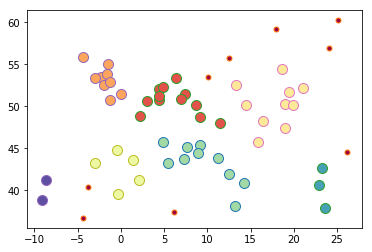

In [10]:
dbscanner(x, y, 3, 2)

Silhouette Coefficient: 0.044
Estimated number of clusters: 3
Homogeneity: 0.120
Completeness: 1.000
V-measure: 0.214
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


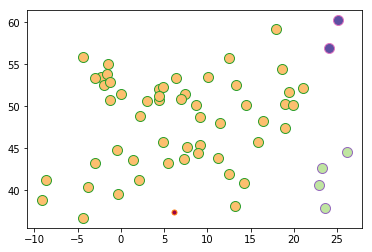

In [11]:
dbscanner(x, y, 5, 2)

# 100 largest cities

In [12]:
hundred = pd.read_csv('100cities.csv')

In [13]:
X = hundred[['Latitude','Longitude']]
x = hundred['Latitude']

In [14]:
y = hundred['Longitude']

In [15]:
lgn.scatter(x, y, labels = hundred['Name'])

In [ ]:
dbscanner(x, y, 2, 2)

In [ ]:
dbscanner(x, y, 3, 2)